In [2]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm

In [3]:
# Load the penguins dataset
penguins = sns.load_dataset('penguins')

In [4]:
pg = penguins[penguins['species'] == 'Gentoo']
# pg = pg[pg['sex'] == 'Male']
pg = pg[['body_mass_g','bill_length_mm']]
pg = pg.dropna()

In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
y = pg['body_mass_g']
x = pg['bill_length_mm']

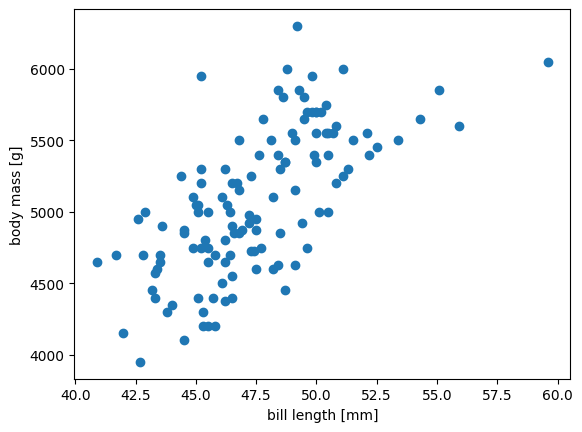

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel="bill length [mm]", ylabel="body mass [g]")

ax.scatter(x, y)

fig.savefig("scatter.png")


In [8]:
# 最小二乗法による線形回帰
lr = LinearRegression()
lr.fit(x.values.reshape(-1, 1), y)

LinearRegression()

In [9]:
y_pred = lr.predict(x.values.reshape(-1, 1))

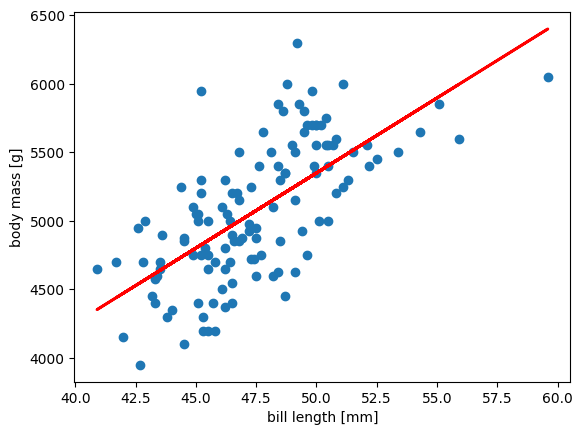

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel="bill length [mm]", ylabel="body mass [g]")

ax.scatter(x, y)
ax.plot(x, y_pred, color='red', linewidth=2, label='Predicted')

fig.savefig("lr_ls.png")

In [11]:
# It's usually necessary to scale the data for SGD
scaler = StandardScaler()
x_sc = scaler.fit_transform(x.values.reshape(-1, 1))

In [12]:
# Create a SGDRegressor model
sgd = SGDRegressor(max_iter=1000, eta0=0.01, penalty='l2')
# Train the model
sgd.fit(x_sc, y)

SGDRegressor()

In [13]:
y_pred_sgd = sgd.predict(x_sc)

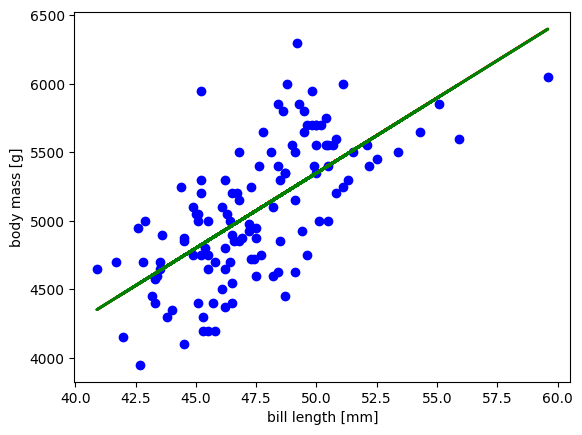

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel="bill length [mm]", ylabel="body mass [g]")

ax.scatter(x, y, color='blue')
ax.plot(x, y_pred, color='red', linewidth=2, label='Predicted')
ax.plot(x, y_pred_sgd, color='green', linewidth=2, label='Predicted')

In [34]:
# モデルの作成
sgd_hist = SGDRegressor(max_iter=1, penalty='l2', eta0=0.001, warm_start=True, learning_rate="constant", random_state=42)

# パラメータの推移を記録するためのリスト
coef_history = []
intercept_history = []

# 最大繰り返し回数
max_iter = 10

# 学習の各イテレーションごとにパラメータを記録
for _ in range(max_iter):
    sgd_hist.partial_fit(x_sc, y)
    coef_history.append(sgd_hist.coef_.copy())
    intercept_history.append(sgd_hist.intercept_.copy())

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [123, 100]

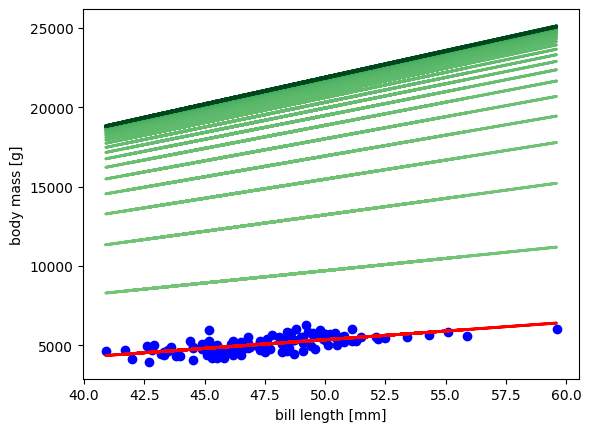

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel="bill length [mm]", ylabel="body mass [g]")

ax.scatter(x, y, color='blue')
ax.plot(x, y_pred, color='red', linewidth=2, label='Predicted')
for _ in range(max_iter):
    y_pred_sgd_hist = coef_history[_] * x + intercept_history[_]
    ax.plot(x, y_pred_sgd_hist, color=cm.Greens((_/max_iter)/2+0.5), linewidth=2, label='Predicted')

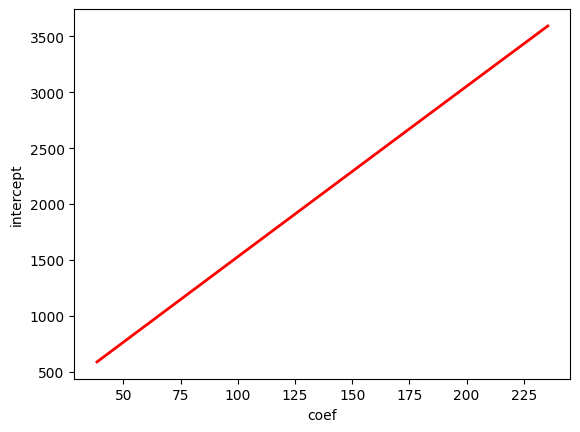

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel="coef", ylabel="intercept")
ax.plot(coef_history, intercept_history, "r", linewidth=2)

In [30]:
coef_history

[array([38.43995382]),
 array([72.4521946]),
 array([102.54670752]),
 array([129.17474005]),
 array([152.73556683]),
 array([173.58247539]),
 array([192.02806257]),
 array([208.34892097]),
 array([222.78978564]),
 array([235.56720325])]

In [31]:
intercept_history

[array([588.0850169]),
 array([1108.03790382]),
 array([1567.75205216]),
 array([1974.20637138]),
 array([2333.57123547]),
 array([2651.30215509]),
 array([2932.22259737]),
 array([3180.59721079]),
 array([3400.19656659]),
 array([3594.35439963])]

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider incre

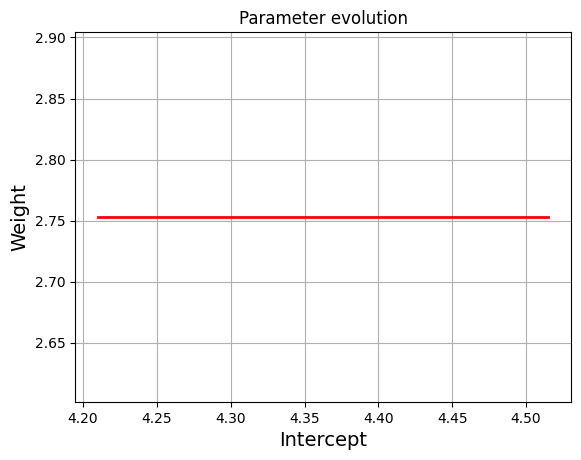

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# データ生成
np.random.seed(0)
X = np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# SGDRegressor インスタンス化
sgd_reg = SGDRegressor(max_iter=1, penalty=None, eta0=0.1, warm_start=True, 
                       learning_rate="invscaling", power_t=0.25, random_state=32)

# パラメータの遷移を保存するリストを初期化
weights = []
intercepts = []

# 50エポック回帰を行い、各エポックでのパラメータを保存
for epoch in range(50):
    sgd_reg.fit(X, y.ravel())
    weights.append(sgd_reg.coef_)
    intercepts.append(sgd_reg.intercept_)

# パラメータの遷移をプロット
plt.plot(intercepts, weights, "r-", linewidth=2)
plt.xlabel("Intercept", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.title("Parameter evolution")
plt.grid(True)
plt.show()

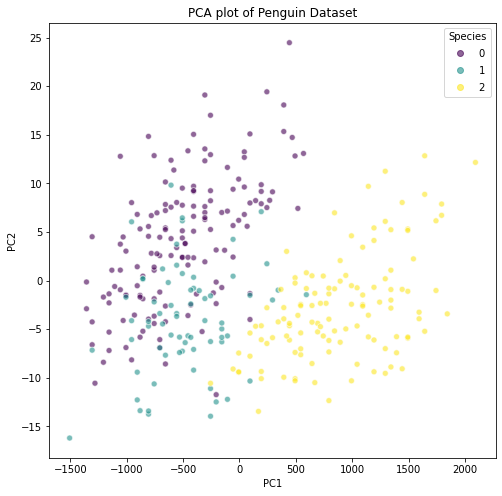

In [1]:
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# データをロード
penguins = sns.load_dataset('penguins').dropna()

# 'species'列を除くすべての数値列を使用
numeric_columns = penguins.select_dtypes(include=['float64', 'int64']).columns
numeric_penguins = penguins[numeric_columns]

# 主成分分析（PCA）を実行
pca = PCA(n_components=2)
penguin_pca = pca.fit_transform(numeric_penguins)

# プロット
plt.figure(figsize=(8, 8))
scatter = plt.scatter(penguin_pca[:, 0], penguin_pca[:, 1], c=penguins['species'].astype('category').cat.codes, alpha=0.6, edgecolors='w')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot of Penguin Dataset')
plt.legend(*scatter.legend_elements(), title='Species')
plt.show()

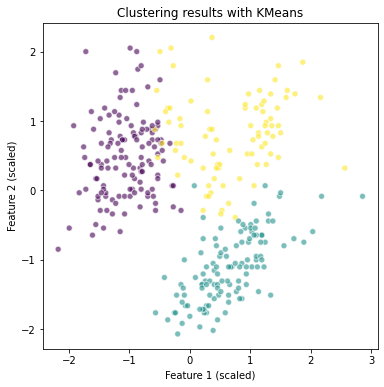

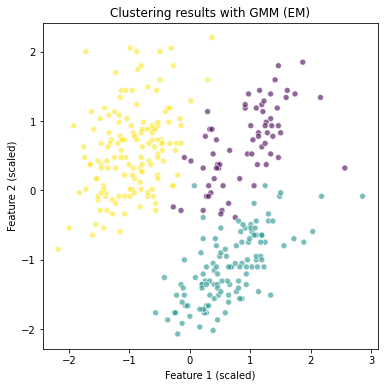

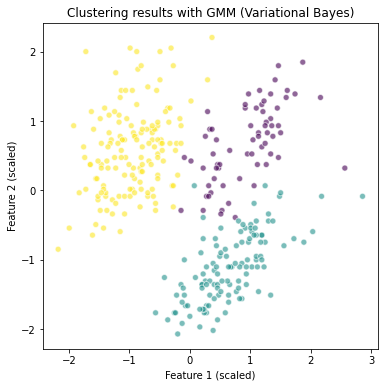

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

# データをロード
penguins = sns.load_dataset('penguins').dropna()

# 'species'列を除くすべての数値列を使用
numeric_columns = penguins.select_dtypes(include=['float64', 'int64']).columns
numeric_penguins = penguins[numeric_columns]

# データを標準化
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(numeric_penguins)

# クラスタリング手法の設定
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=3, random_state=0),
    'GMM (EM)': GaussianMixture(n_components=3, random_state=0),
    'GMM (Variational Bayes)': BayesianGaussianMixture(n_components=3, random_state=0)
}

# 各手法でクラスタリングを実行し、結果をプロット
for i, (name, algorithm) in enumerate(clustering_algorithms.items()):
    # クラスタリングを実行
    y_pred = algorithm.fit_predict(penguins_scaled)
    
    # プロット
    plt.figure(i, figsize=(6, 6))
    scatter = plt.scatter(penguins_scaled[:, 0], penguins_scaled[:, 1], c=y_pred, alpha=0.6, edgecolors='w')
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.title(f'Clustering results with {name}')
    plt.show()
